In [8]:
# Importing libraries

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [9]:
# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Define the model 

def create_model(learning_rate):
    model = Sequential([
        Input(shape=(20,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [11]:
# Hyperparameter search

batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

best_accuracy = 0
best_params = {}
best_model = None

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for epochs in epochs_list:
            model = create_model(learning_rate)
            model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
            
            y_pred = (model.predict(X_test) > 0.5).astype(int)
            accuracy = accuracy_score(y_test, y_pred)
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'batch_size': batch_size, 'learning_rate': learning_rate, 'epochs': epochs}
                best_model = model

print(f"Best parameters: {best_params}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Best parameters: {'batch_size': 2, 'learning_rate': 0.001, 'epochs': 5}


In [ ]:
# Evaluate on test set

y_pred_proba = best_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Test Accuracy: 0.8650
Test F1 Score: 0.8657


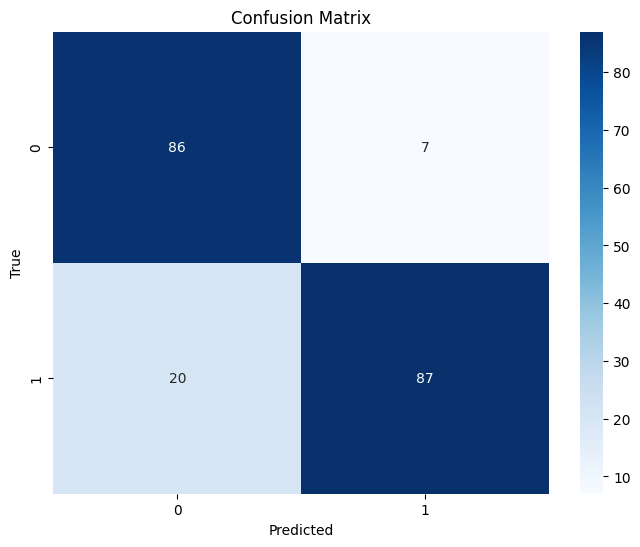

In [14]:
# Plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
# Show inputs, predictions, and truth values for 5 samples

sample_indices = np.random.choice(len(X_test), 5, replace=False)
for idx in sample_indices:
    input_sample = X_test[idx]
    true_label = y_test[idx]
    pred_prob = best_model.predict(input_sample.reshape(1, -1))[0][0]
    pred_label = int(pred_prob > 0.5)
    
    print(f"Sample {idx}:")
    print(f"Input: {input_sample}")
    print(f"True label: {true_label}")
    print(f"Predicted probability: {pred_prob:.4f}")
    print(f"Predicted label: {pred_label}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Sample 57:
Input: [-1.37136715  0.78275606 -1.91021486  1.12165942  0.8924856  -0.97949234
  0.05880021 -1.51543452 -0.1180112  -0.06775473 -0.43114302  1.69837796
 -1.76384549  0.70130611 -0.15105608  2.62644888 -0.25235526 -0.83105011
  0.93678378  0.14259351]
True label: 1
Predicted probability: 0.0487
Predicted label: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Sample 77:
Input: [ 0.21714057 -0.08238585  1.89052823  0.49442354 -0.23973829  0.03587143
  0.7717266   0.8182246  -1.51929107  0.98429164 -0.02584305 -0.86712803
 -1.06421542 -0.46498087  0.09216763 -1.27596925 -0.85275463  0.16699189
 -0.06124019  0.621796  ]
True label: 1
Predicted probability: 0.6645
Predicted label: 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Sample 102:
Input: [ 0.87724562  1.72181027  0.37915178  1.03139851  1.08542665 -1.49679736
 -1.71088941  0.38232135 -1.32295959 -0.10198283  0.29036251  1.39929096
  1.41552919  0.49679583 -1.07857697  0.50825615  0.53807482  2.319